In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [62]:
df = pd.read_csv('mldata.csv')

In [ ]:
df.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,Interested subjects,interested career area,Type of company want to settle in?,Taken inputs from seniors or elders,Interested Type of Books,Management or Technical,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,5,0,6,2,yes,no,information security,testing,poor,poor,programming,testing,BPA,no,Series,Management,smart worker,yes,no,Applications Developer
1,7,6,4,3,no,yes,shell programming,testing,excellent,medium,Management,system developer,Cloud Services,yes,Autobiographies,Technical,hard worker,no,yes,Applications Developer
2,2,3,9,1,no,yes,information security,testing,excellent,poor,data engineering,Business process analyst,product development,yes,Travel,Technical,smart worker,no,no,Applications Developer
3,2,6,3,5,no,yes,r programming,database security,excellent,poor,networks,testing,Testing and Maintainance Services,yes,Guide,Management,smart worker,yes,yes,Applications Developer
4,2,0,3,4,yes,no,distro making,game development,excellent,medium,Software Engineering,system developer,BPA,no,Health,Technical,hard worker,yes,no,Applications Developer


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Logical quotient rating              6901 non-null   int64 
 1   hackathons                           6901 non-null   int64 
 2   coding skills rating                 6901 non-null   int64 
 3   public speaking points               6901 non-null   int64 
 4   self-learning capability?            6901 non-null   object
 5   Extra-courses did                    6901 non-null   object
 6   certifications                       6901 non-null   object
 7   workshops                            6901 non-null   object
 8   reading and writing skills           6901 non-null   object
 9   memory capability score              6901 non-null   object
 10  Interested subjects                  6901 non-null   object
 11  interested career area               6901 n

In [ ]:
df.isnull().sum()

Logical quotient rating                0
hackathons                             0
coding skills rating                   0
public speaking points                 0
self-learning capability?              0
Extra-courses did                      0
certifications                         0
workshops                              0
reading and writing skills             0
memory capability score                0
Interested subjects                    0
interested career area                 0
Type of company want to settle in?     0
Taken inputs from seniors or elders    0
Interested Type of Books               0
Management or Technical                0
hard/smart worker                      0
worked in teams ever?                  0
Introvert                              0
Suggested Job Role                     0
dtype: int64

In [3]:
#Numerical features
df.select_dtypes(include=np.number).columns.tolist()

['Logical quotient rating',
 'hackathons',
 'coding skills rating',
 'public speaking points']

In [12]:
# Categorical Columns
df.select_dtypes(include=['object']).columns.tolist()


['self-learning capability?',
 'Extra-courses did',
 'certifications',
 'workshops',
 'reading and writing skills',
 'memory capability score',
 'Interested subjects',
 'interested career area ',
 'Type of company want to settle in?',
 'Taken inputs from seniors or elders',
 'Interested Type of Books',
 'Management or Technical',
 'hard/smart worker',
 'worked in teams ever?',
 'Introvert',
 'Suggested Job Role']

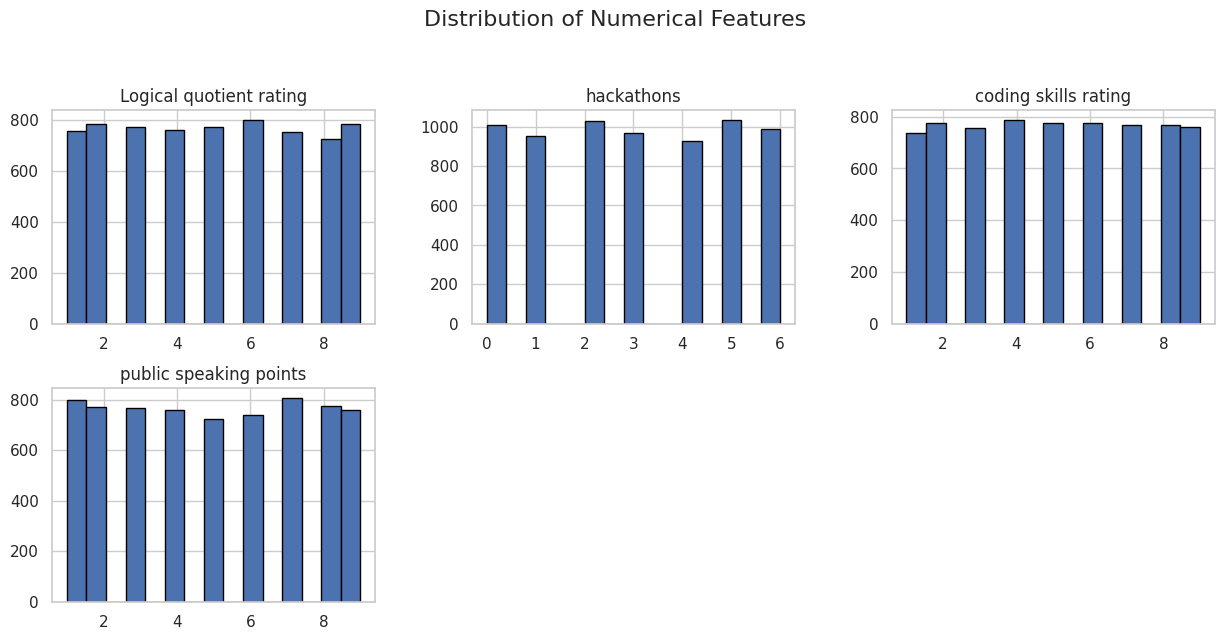

<ipython-input-63-d8de2833380d>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="viridis")
<ipython-input-63-d8de2833380d>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="viridis")
<ipython-input-63-d8de2833380d>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="viridis")
<ipython-input-63-d8de2833380d>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=

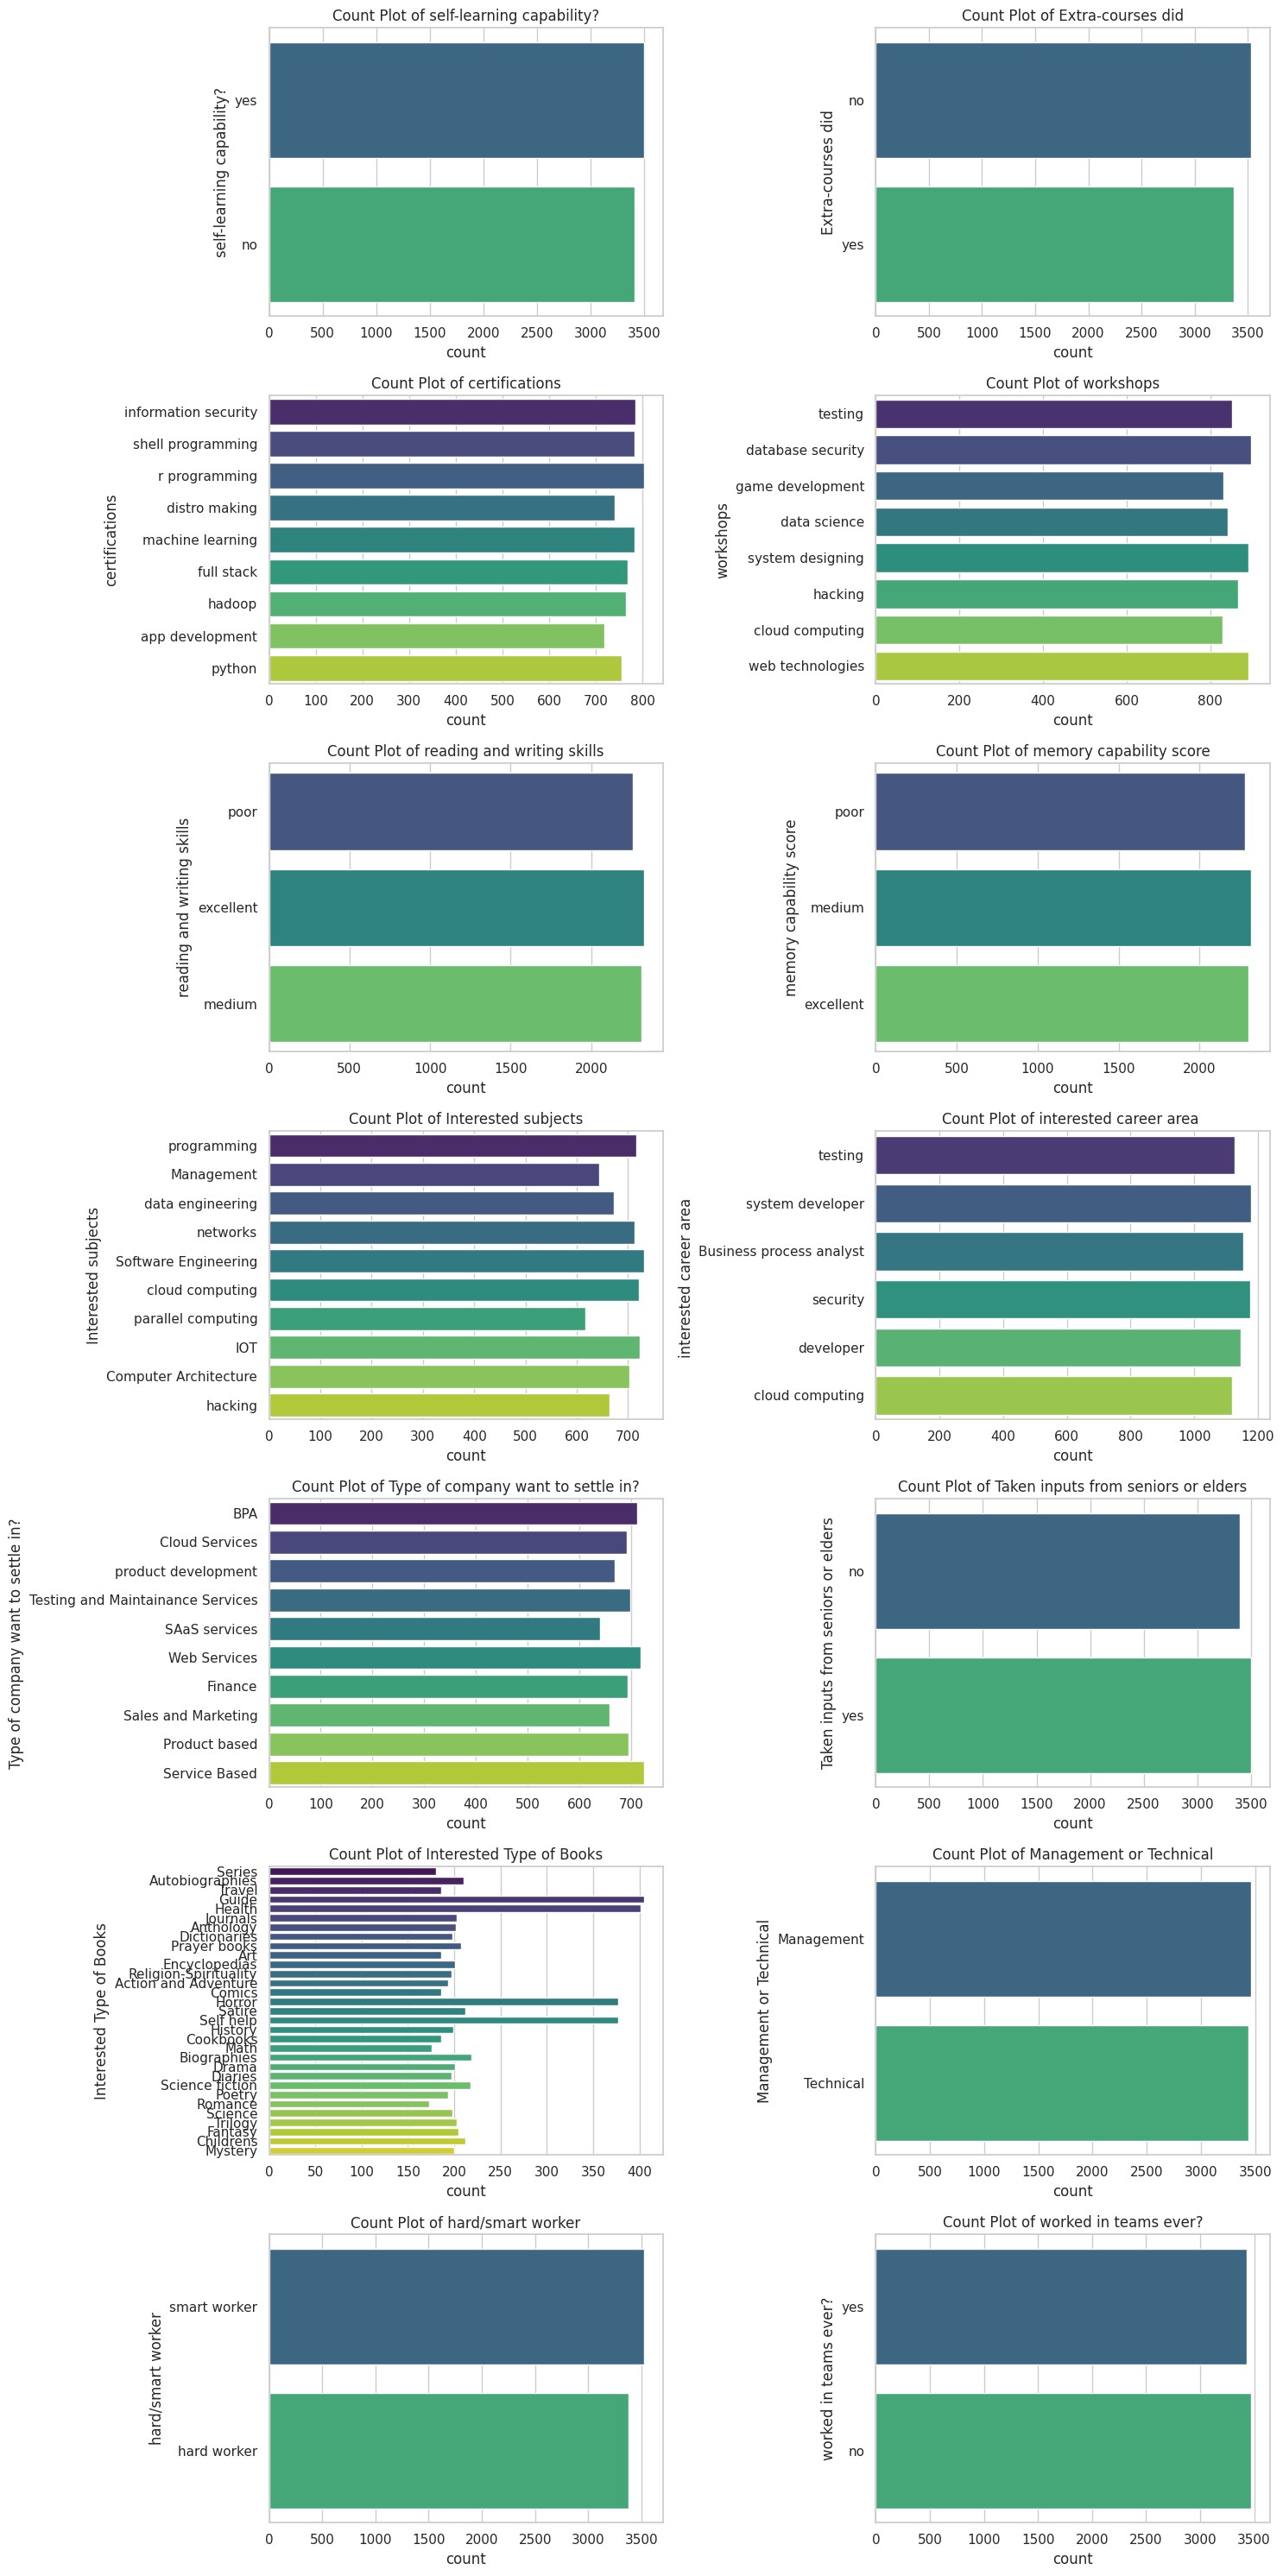

In [63]:
# Set the style
sns.set(style="whitegrid")

# Plotting the distribution of numerical features
numerical_columns = [
    'Logical quotient rating',
    'hackathons',
    'coding skills rating',
    'public speaking points'
]

# Plot histograms for numerical features
df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(3, 3), edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

# Plotting count plots for categorical features
categorical_columns = [
    'self-learning capability?',
 'Extra-courses did',
 'certifications',
 'workshops',
 'reading and writing skills',
 'memory capability score',
 'Interested subjects',
 'interested career area ',
 'Type of company want to settle in?',
 'Taken inputs from seniors or elders',
 'Interested Type of Books',
 'Management or Technical',
 'hard/smart worker',
 'worked in teams ever?',
]

# Plot count plots for categorical features
plt.figure(figsize=(15, 30))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(7, 2, i)
    sns.countplot(y=col, data=df, palette="viridis")
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()


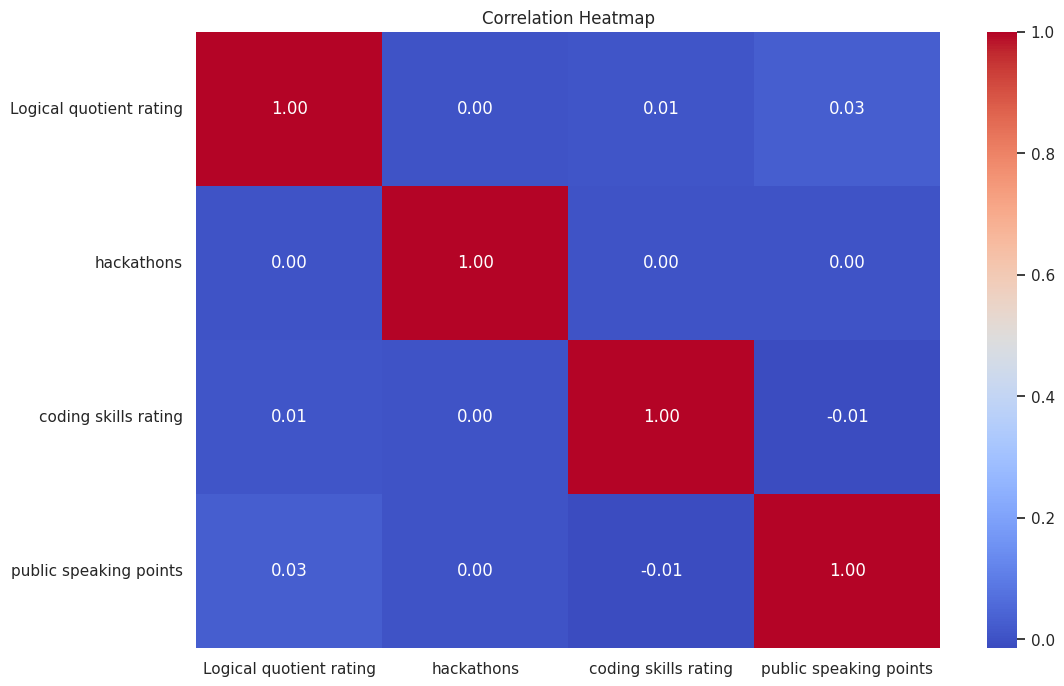

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Suggested Job Role
Network Security Engineer                    630
Software Engineer                            590
UX Designer                                  589
Software Developer                           587
Database Developer                           581
Software Quality Assurance (QA) / Testing    571
Web Developer                                570
CRM Technical Developer                      567
Technical Support                            565
Systems Security Administrator               562
Applications Developer                       551
Mobile Applications Developer                538
Name: count, dtype: int64


<ipython-input-5-e2e2dd9fe093>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_role_percentages.index, y=job_role_percentages.values, palette="viridis")


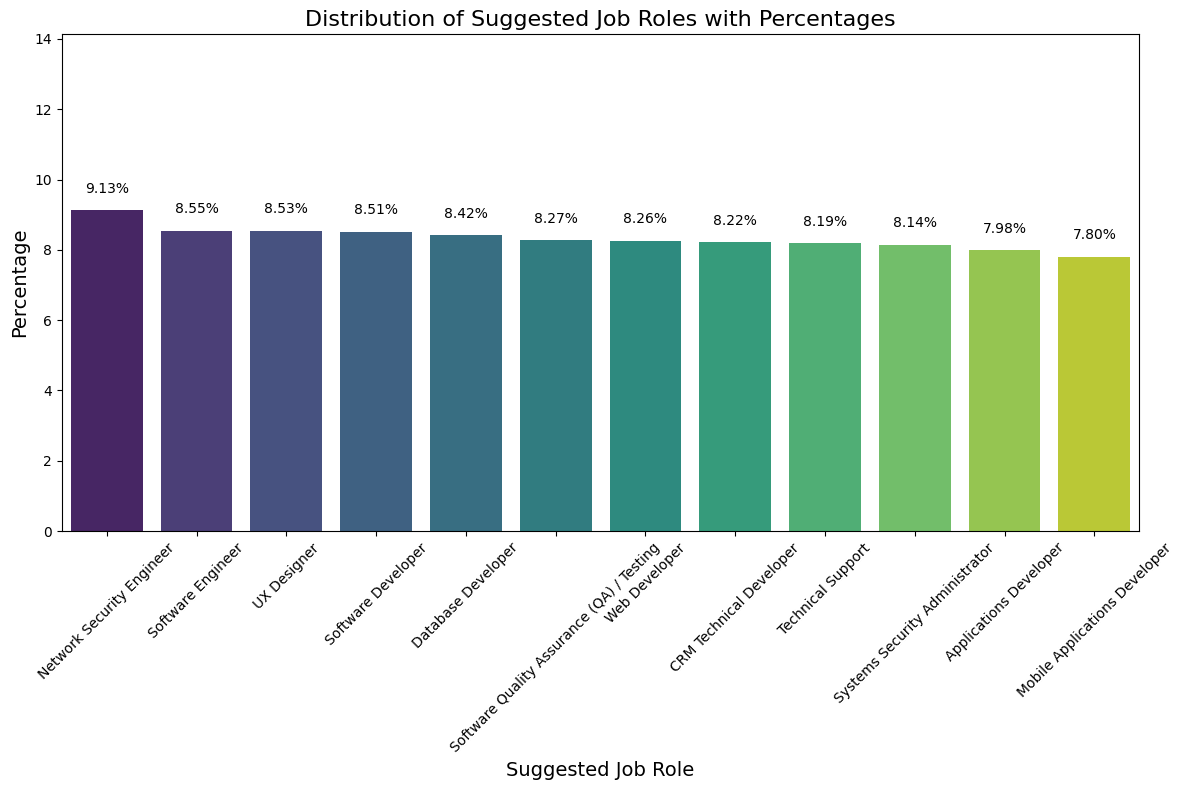

In [5]:
# Count the occurrences of each job role
job_role_counts = df["Suggested Job Role"].value_counts()
print(job_role_counts)
# Calculate the percentages
job_role_percentages = 100 * job_role_counts / len(df)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=job_role_percentages.index, y=job_role_percentages.values, palette="viridis")

# Annotate the bars with percentages
for index, value in enumerate(job_role_percentages.values):
    plt.text(index, value + 0.5, f"{value:.2f}%", ha='center')

# Set plot title and labels
plt.title('Distribution of Suggested Job Roles with Percentages', fontsize=16)
plt.xlabel('Suggested Job Role', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, max(job_role_percentages.values) + 5)

# Display the plot
plt.tight_layout()
plt.show()

In [64]:
# Encoding categorical variables (One hot encoding)
categorical_columns = [
    'self-learning capability?',
 'Extra-courses did',
 'certifications',
 'workshops',
 'reading and writing skills',
 'memory capability score',
 'Interested subjects',
 'interested career area ',
 'Type of company want to settle in?',
 'Taken inputs from seniors or elders',
 'Interested Type of Books',
 'Management or Technical',
 'hard/smart worker',
 'worked in teams ever?',
    'Introvert',
]
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the updated DataFrame with encoded categorical columns
print(df.head())

   Logical quotient rating  hackathons  coding skills rating  \
0                        5           0                     6   
1                        7           6                     4   
2                        2           3                     9   
3                        2           6                     3   
4                        2           0                     3   

   public speaking points  self-learning capability?  Extra-courses did  \
0                       2                          1                  0   
1                       3                          0                  1   
2                       1                          0                  1   
3                       5                          0                  1   
4                       4                          1                  0   

   certifications  workshops  reading and writing skills  \
0               4          6                           2   
1               8          6                

In [65]:
#Label Encoding target variable
label_encoder = LabelEncoder()
df["Suggested Job Role"] = label_encoder.fit_transform(df["Suggested Job Role"])

In [66]:
# Feature Scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [35]:
unique_classes = np.unique(y)
print("Unique classes in y:", unique_classes)

Unique classes in y: [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [67]:
# Splitting the dataset
X = df.drop(columns=["Suggested Job Role"])
y = df["Suggested Job Role"]


In [68]:
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Training the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Making predictions
y_pred1 = dt.predict(X_test)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred1))

print("\nClassification Report:")
print(classification_report(y_test, y_pred1))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred1))

Confusion Matrix:
[[1 0 0 0 1 1 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 1 0]
 [0 0 0 3 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 1 0 0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.50      1.00      0.67         1
           2       1.00      0.50      0.67         2
           3       0.75      0.60      0.67         5
           5       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       1.00      0.50      0.67         2
           9       0.33      1.00      0.50         2
          10       0.50      1.00      0.67         1
          11       0.00      0.00      0.00         2

    accuracy                           0.50        20
   macro avg       0.51      0.48      0.42        20
weighted avg       0.67

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [31]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],     # Number of trees in the forest
    'max_depth': [None, 10, 20],         # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]        # Minimum number of samples required to be at a leaf node
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

y_pred = best_rf.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         2
           3       0.60      0.60      0.60         5
           5       0.00      0.00      0.00         0
           7       0.33      1.00      0.50         1
           8       0.67      1.00      0.80         2
           9       0.67      1.00      0.80         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2

    accuracy                           0.55        20
   macro avg       0.43      0.48      0.41        20
weighted avg       0.60      0.55      0.52        20


Accuracy Score: 0.55


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [36]:
from lightgbm import LGBMClassifier
# Define the parameter grid for GridSearchCV
param_grid = {
    'num_leaves': [20, 30, 40],             # Maximum number of leaves in one tree
    'max_depth': [5, 10, 15],               # Maximum depth of tree
    'learning_rate': [0.05, 0.1, 0.2],      # Learning rate
    'n_estimators': [50, 100, 200]          # Number of boosted trees to fit
}

# Initialize LightGBM classifier
lgbm = LGBMClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Extract the best model from grid search
best_lgbm = grid_search.best_estimator_

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the test set
y_pred = best_lgbm.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 144
[LightGBM] [Info] Number of data points in the train set: 63, number of used features: 16
[LightGBM] [Info] Start training from score -2.063693
[LightGBM] [Info] Start training from score -2.533697
[LightGBM] [Info] Start training from score -3.044522
[LightGBM] [Info] Start training from score -1.504077
[LightGBM] [Info] Start training from score -2.756840
[LightGBM] [Info] Start training from score -4.143135
[LightGBM] [Info] Start training from score -2.533697
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.063693
[LightGBM] [Info] Start

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': ['scale', 'auto', 0.1, 1],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

grid_search = GridSearchCV(SVC(decision_function_shape='ovr', random_state=42),
                           param_grid, cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate best model on test set
y_pred = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         2
           3       0.62      1.00      0.77         5
           7       0.25      1.00      0.40         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         2

    accuracy                           0.70        20
   macro avg       0.65      0.69      0.62        20
weighted avg       0.72      0.70      0.64        20


Accuracy Score: 0.7


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5000

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         2
           3       0.60      0.60      0.60         5
           7       0.00      0.00      0.00         1
           8       0.50      1.00      0.67         2
           9       1.00      1.00      1.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2

    accuracy                           0.50        20
   macro avg       0.40      0.43      0.40        20
weighted avg       0.50      0.50      0.48        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
